In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
from Blackbox import load_model
model = load_model()
model

[11-19 12:03:07][INFO] /home/daxrpm/Desktop/EPN/metodos_numericos/proyecto/Blackbox/blackbox.py
[11-19 12:03:07][INFO] 2025-11-19 12:03:07.054569


2025-11-19 12:03:07.416157: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-19 12:03:07.416719: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-19 12:03:07.419275: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-19 12:03:07.427455: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-19 12:03:07.444327: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

Current working directory: /home/daxrpm/Desktop/EPN/metodos_numericos/proyecto


<Sequential name=sequential_14, built=True>

In [3]:
%autoreload 2
from Blackbox import predict_point, predict_batch
predict_point(model, 0.2, 0.4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


1.0

In [4]:
predict_point(model, 1.1, 4.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


0.0

In [5]:
%autoreload 2
from Blackbox import predict_point, predict_batch
predict_batch(model, [0.2, 1.1], [0.4, 1.3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


[1.0, 0.0]

# EXPLORACIÓN INICIAL 



In [7]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from Blackbox import predict_point, predict_batch



[11-19 12:03:40][INFO] Failed to extract font properties from /usr/share/fonts/google-noto-sans-cjk-vf-fonts/NotoSansCJK-VF.ttc: Can not load face (SFNT font table missing; error code 0x8e)
[11-19 12:03:40][INFO] Failed to extract font properties from /usr/share/fonts/abattis-cantarell-vf-fonts/Cantarell-VF.otf: Can not load face (SFNT font table missing; error code 0x8e)
[11-19 12:03:40][INFO] Failed to extract font properties from /usr/share/fonts/google-noto-sans-mono-cjk-vf-fonts/NotoSansMonoCJK-VF.ttc: Can not load face (SFNT font table missing; error code 0x8e)
[11-19 12:03:40][INFO] Failed to extract font properties from /usr/share/fonts/google-noto-serif-cjk-vf-fonts/NotoSerifCJK-VF.ttc: Can not load face (SFNT font table missing; error code 0x8e)
[11-19 12:03:40][INFO] generated new fontManager


In [8]:

x1_valores = np.linspace(-0, 23, 500)
x2_valores = np.linspace(-1, 4, 500)


X1, X2 = np.meshgrid(x1_valores, x2_valores)


x1_flat = X1.flatten()
x2_flat = X2.flatten()

print(f"{len(x1_flat)} puntos")
print(f"   Rango de x1: [{x1_valores.min():.2f}, {x1_valores.max():.2f}]")
print(f"   Rango de x2: [{x2_valores.min():.2f}, {x2_valores.max():.2f}]")


250000 puntos
   Rango de x1: [0.00, 23.00]
   Rango de x2: [-1.00, 4.00]


In [9]:

resultados = predict_batch(model, x1_flat.tolist(), x2_flat.tolist())
resultados = np.array(resultados)


num_ceros = np.sum(resultados == 0)
num_unos = np.sum(resultados == 1)

print(f"   Puntos clasificados como 0: {num_ceros} ({num_ceros/len(resultados)*100:.1f}%)")
print(f"   Puntos clasificados como 1: {num_unos} ({num_unos/len(resultados)*100:.1f}%)")


7813/7813 ━━━━━━━━━━━━━━━━━━━━ 3s 424us/step
   Puntos clasificados como 0: 247224 (98.9%)
   Puntos clasificados como 1: 2776 (1.1%)


## Paso 2: Visualización de los resultados

Ahora grafiquemos los puntos para ver visualmente la frontera de decisión.


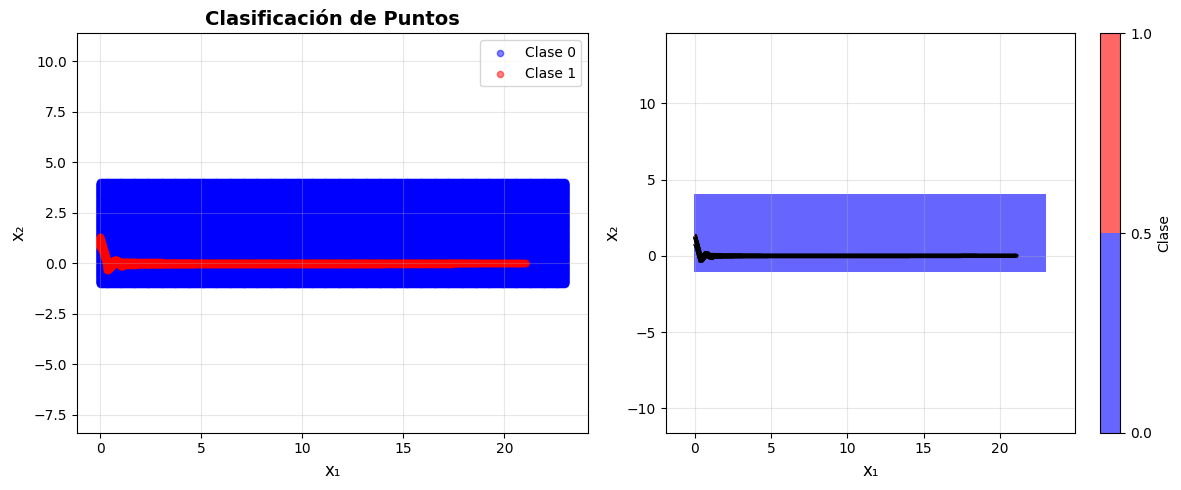

In [12]:

Z = resultados.reshape(X1.shape)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1_flat[resultados == 0], x2_flat[resultados == 0], 
            c='blue', alpha=0.5, label='Clase 0', s=20)
plt.scatter(x1_flat[resultados == 1], x2_flat[resultados == 1], 
            c='red', alpha=0.5, label='Clase 1', s=20)
plt.xlabel('x₁', fontsize=12)
plt.ylabel('x₂', fontsize=12)
plt.title('Clasificación de Puntos', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')

plt.subplot(1, 2, 2)
contour = plt.contourf(X1, X2, Z, levels=[0, 0.5, 1], colors=['blue', 'red'], alpha=0.6)
plt.contour(X1, X2, Z, levels=[0.5], colors='black', linewidths=3)
plt.xlabel('x₁', fontsize=12)
plt.ylabel('x₂', fontsize=12)
plt.colorbar(contour, label='Clase')
plt.grid(True, alpha=0.3)
plt.axis('equal')

plt.tight_layout()
plt.show()



## Paso 3: Análisis de puntos específicos en la frontera

Vamos a buscar puntos exactos que estén en la frontera para entender mejor la relación.


In [14]:
puntos_prueba = [
    (0.0, 0.0), (0.5, 0.5), (1.0, 1.0), (1.5, 1.5), (2.0, 2.0),
    (0.0, 1.0), (1.0, 0.0), (2.0, 1.0), (1.0, 2.0),
    (3.0, 3.0), (4.0, 4.0), (0.5, 2.0), (2.0, 0.5)
]

print(f"{'x₁':>6} {'x₂':>6} → {'Resultado':>10}")
print("-" * 30)

for x1, x2 in puntos_prueba:
    resultado = predict_point(model, x1, x2)
    print(f"{x1:6.2f} {x2:6.2f} → {resultado:10.0f}")


    x₁     x₂ →  Resultado
------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
  0.00   0.00 →          0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
  0.50   0.50 →          0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
  1.00   1.00 →          0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
  1.50   1.50 →          0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
  2.00   2.00 →          0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
  0.00   1.00 →          1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
  1.00   0.00 →          1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
  2.00   1.00 →          0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
  1.00   2.00 →          0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
  3.00   3.00 →          0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
  4.00   4.00 →          0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
  0.50   2.00 →          0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
  2.00   0.50 →          0


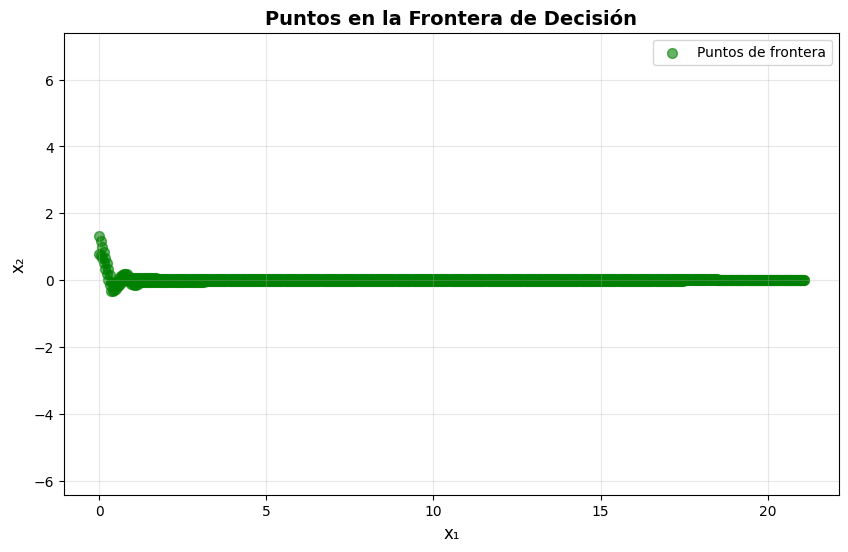


📋 Primeros 10 puntos de frontera:
      x₁       x₂      x₂/x₁      x₁²+x₂²
------------------------------------------
   0.000    0.799        inf        0.638
   0.000    1.320        inf        1.741
   0.046    0.759     16.457        0.577
   0.046    1.159     25.152        1.346
   0.092    0.668      7.250        0.455
   0.092    0.999     10.837        1.006
   0.138    0.518      3.746        0.287
   0.138    0.839      6.065        0.723
   0.184    0.348      1.886        0.155
   0.184    0.668      3.625        0.481


In [15]:

puntos_frontera_x1 = []
puntos_frontera_x2 = []

for i in range(len(x1_valores)):
    x1_val = x1_valores[i]
    for j in range(len(x2_valores) - 1):
        idx_actual = j * len(x1_valores) + i
        idx_siguiente = (j + 1) * len(x1_valores) + i
        
        if resultados[idx_actual] != resultados[idx_siguiente]:
            # Hay un cambio de clase aquí
            puntos_frontera_x1.append(x1_val)
            puntos_frontera_x2.append((x2_valores[j] + x2_valores[j + 1]) / 2)

puntos_frontera_x1 = np.array(puntos_frontera_x1)
puntos_frontera_x2 = np.array(puntos_frontera_x2)


# Visualizar solo la frontera
plt.figure(figsize=(10, 6))
plt.scatter(puntos_frontera_x1, puntos_frontera_x2, c='green', s=50, alpha=0.6, label='Puntos de frontera')
plt.xlabel('x₁', fontsize=12)
plt.ylabel('x₂', fontsize=12)
plt.title('Puntos en la Frontera de Decisión', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

# Mostrar algunos valores
print("\n📋 Primeros 10 puntos de frontera:")
print(f"{'x₁':>8} {'x₂':>8} {'x₂/x₁':>10} {'x₁²+x₂²':>12}")
print("-" * 42)
for i in range(min(10, len(puntos_frontera_x1))):
    x1 = puntos_frontera_x1[i]
    x2 = puntos_frontera_x2[i]
    ratio = x2/x1 if x1 > 0.01 else float('inf')
    suma_cuadrados = x1**2 + x2**2
    print(f"{x1:8.3f} {x2:8.3f} {ratio:10.3f} {suma_cuadrados:12.3f}")


In [17]:
def biseccion_frontera(model, x1_fijo, x2_min, x2_max, tolerancia=1e-6, max_iter=100):

    a, b = x2_min, x2_max
    iteraciones = 0
    
    for i in range(max_iter):
        iteraciones += 1
        c = (a + b) / 2  # Punto medio
        
        # Evaluar el modelo en el punto medio
        resultado = predict_point(model, x1_fijo, c)
        
        # Si el intervalo es suficientemente pequeño, terminamos
        if abs(b - a) < tolerancia:
            return c, iteraciones
        
        # Determinar en qué mitad está la frontera
        resultado_a = predict_point(model, x1_fijo, a)
        
        if resultado == resultado_a:
            a = c  # La frontera está en [c, b]
        else:
            b = c  # La frontera está en [a, c]
    
    return (a + b) / 2, iteraciones

# Probar el método de bisección en varios puntos
print("🔍 Encontrando puntos exactos en la frontera usando BISECCIÓN:\n")
print(f"{'x₁':>8} {'x₂ (frontera)':>15} {'x₁ × x₂':>12} {'Iteraciones':>12}")
print("-" * 60)

x1_valores_test = [0.1, 0.5, 1.0, 2.0, 3.0, 5.0, 7.0, 10.0, 15.0, 20.0]
puntos_biseccion_x1 = []
puntos_biseccion_x2 = []
productos_biseccion = []

for x1 in x1_valores_test:
    # Buscar la frontera en un rango amplio de x₂
    x2_frontera, iters = biseccion_frontera(model, x1, -5, 5, tolerancia=1e-8)
    producto = x1 * x2_frontera
    
    puntos_biseccion_x1.append(x1)
    puntos_biseccion_x2.append(x2_frontera)
    productos_biseccion.append(producto)
    
    print(f"{x1:8.2f} {x2_frontera:15.8f} {producto:12.8f} {iters:12d}")

puntos_biseccion_x1 = np.array(puntos_biseccion_x1)
puntos_biseccion_x2 = np.array(puntos_biseccion_x2)
productos_biseccion = np.array(productos_biseccion)

print(f"   Media de x₁ × x₂: {np.mean(productos_biseccion):.10f}")
print(f"   Desv. Std: {np.std(productos_biseccion):.10f}")


🔍 Encontrando puntos exactos en la frontera usando BISECCIÓN:

      x₁   x₂ (frontera)      x₁ × x₂  Iteraciones
------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

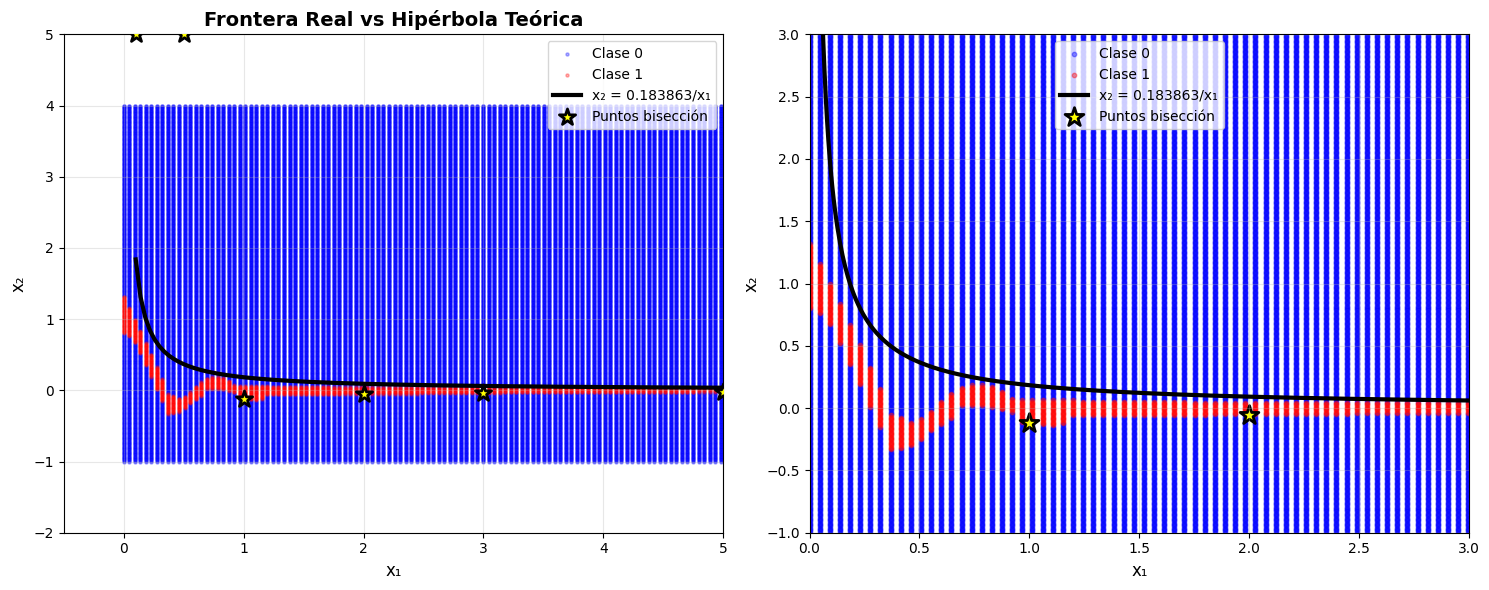

In [18]:
# Calcular la constante C promedio
C = np.mean(productos_biseccion)

# Generar curva teórica: x₂ = C / x₁
x1_curva = np.linspace(0.1, 20, 500)
x2_curva = C / x1_curva

# Visualización completa
plt.figure(figsize=(15, 6))

# Gráfico 1: Frontera completa con hipérbola teórica
plt.subplot(1, 2, 1)
# Puntos clasificados
plt.scatter(x1_flat[resultados == 0], x2_flat[resultados == 0], 
            c='blue', alpha=0.3, label='Clase 0', s=5)
plt.scatter(x1_flat[resultados == 1], x2_flat[resultados == 1], 
            c='red', alpha=0.3, label='Clase 1', s=5)
# Curva teórica
plt.plot(x1_curva, x2_curva, 'k-', linewidth=3, label=f'x₂ = {C:.6f}/x₁', zorder=5)
# Puntos de bisección
plt.scatter(puntos_biseccion_x1, puntos_biseccion_x2, c='yellow', s=150, marker='*', 
            edgecolors='black', linewidths=2, label='Puntos bisección', zorder=6)
plt.xlabel('x₁', fontsize=12)
plt.ylabel('x₂', fontsize=12)
plt.title('Frontera Real vs Hipérbola Teórica', fontsize=14, fontweight='bold')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.xlim(-0.5, 5)
plt.ylim(-2, 5)

# Gráfico 2: Zoom cerca del origen
plt.subplot(1, 2, 2)
# Filtrar puntos cerca del origen
mask_cerca = (x1_flat < 3) & (x2_flat < 3) & (x2_flat > -2)
plt.scatter(x1_flat[mask_cerca & (resultados == 0)], x2_flat[mask_cerca & (resultados == 0)], 
            c='blue', alpha=0.4, label='Clase 0', s=10)
plt.scatter(x1_flat[mask_cerca & (resultados == 1)], x2_flat[mask_cerca & (resultados == 1)], 
            c='red', alpha=0.4, label='Clase 1', s=10)
# Curva teórica (zoom)
x1_zoom = np.linspace(0.05, 3, 500)
x2_zoom = C / x1_zoom
plt.plot(x1_zoom, x2_zoom, 'k-', linewidth=3, label=f'x₂ = {C:.6f}/x₁')
# Puntos de bisección
mask_biseccion = puntos_biseccion_x1 < 3
plt.scatter(puntos_biseccion_x1[mask_biseccion], puntos_biseccion_x2[mask_biseccion], 
            c='yellow', s=200, marker='*', edgecolors='black', linewidths=2, label='Puntos bisección')
plt.xlabel('x₁', fontsize=12)
plt.ylabel('x₂', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 3)
plt.ylim(-1, 3)

plt.tight_layout()
plt.show()



In [19]:
# MÉTODO 2: Regresión no lineal usando optimización
from scipy.optimize import curve_fit

# Definir la función hiperbólica: x2 = C / x1
def hiperbola(x1, C):
    return C / x1

# Filtrar puntos válidos (x1 > 0) de la exploración inicial
mask_validos = puntos_frontera_x1 > 0.1
x1_datos = puntos_frontera_x1[mask_validos]
x2_datos = puntos_frontera_x2[mask_validos]

# Ajustar la curva usando mínimos cuadrados
try:
    # curve_fit usa el algoritmo de Levenberg-Marquardt (método de mínimos cuadrados)
    parametros_optimos, covarianza = curve_fit(hiperbola, x1_datos, x2_datos, p0=[0.05])
    C_ajustado = parametros_optimos[0]
    
    # Calcular el error estándar
    error_estandar = np.sqrt(np.diag(covarianza))[0]
    
    print(f"   C = {C_ajustado:.10f} ± {error_estandar:.10f}")
    print(f"\n   Ecuación: x₂ = {C_ajustado:.10f} / x₁")
    
    # Calcular el error de ajuste (residuos)
    x2_predicho = hiperbola(x1_datos, C_ajustado)
    residuos = x2_datos - x2_predicho
    error_cuadratico_medio = np.sqrt(np.mean(residuos**2))
    
    print(f"   Error cuadrático medio (RMSE): {error_cuadratico_medio:.10f}")
    print(f"   Residuo máximo: {np.max(np.abs(residuos)):.10f}")
    
except Exception as e:
    C_ajustado = C  # Usar el valor de bisección como respaldo


   C = 0.0450025479 ± 0.0028043396

   Ecuación: x₂ = 0.0450025479 / x₁
   Error cuadrático medio (RMSE): 0.0538935395
   Residuo máximo: 0.5132241463


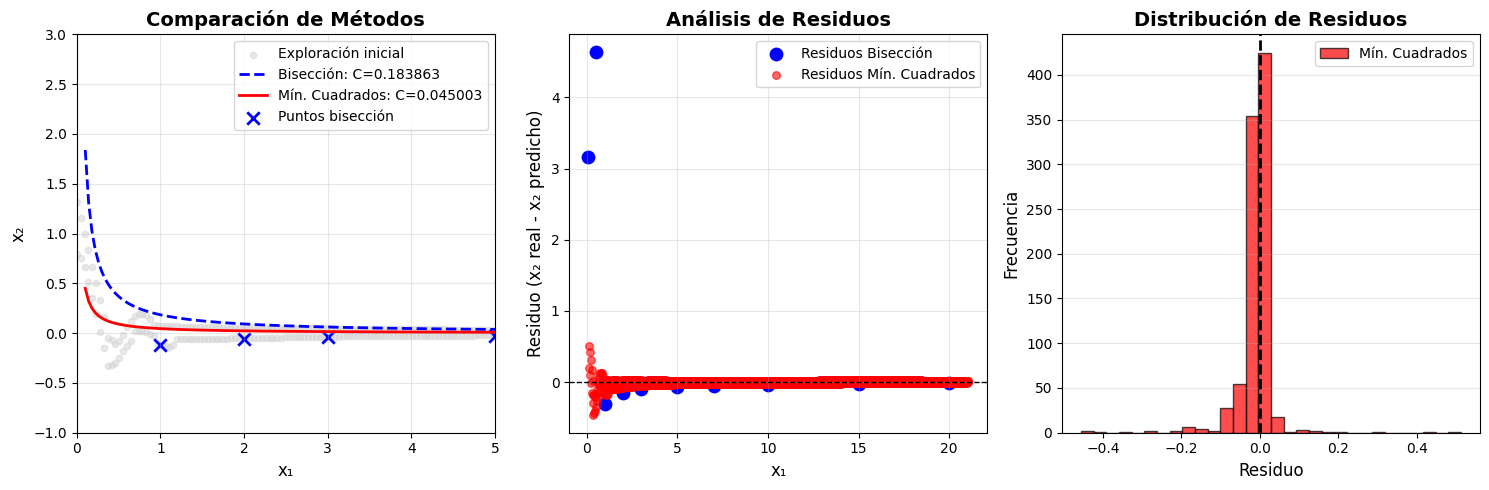

   Método 1 (Bisección):          C = 0.1838631112
   Método 2 (Mínimos Cuadrados):  C = 0.0450025479
   Diferencia absoluta:           ΔC = 0.1388605634


In [20]:
x1_curva_ajustado = np.linspace(0.1, 20, 500)
x2_curva_ajustado = hiperbola(x1_curva_ajustado, C_ajustado)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(puntos_frontera_x1, puntos_frontera_x2, c='lightgray', s=20, alpha=0.5, label='Exploración inicial')
plt.plot(x1_curva, x2_curva, 'b--', linewidth=2, label=f'Bisección: C={C:.6f}')
plt.plot(x1_curva_ajustado, x2_curva_ajustado, 'r-', linewidth=2, label=f'Mín. Cuadrados: C={C_ajustado:.6f}')
plt.scatter(puntos_biseccion_x1, puntos_biseccion_x2, c='blue', s=80, marker='x', linewidths=2, label='Puntos bisección')
plt.xlabel('x₁', fontsize=12)
plt.ylabel('x₂', fontsize=12)
plt.title('Comparación de Métodos', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 5)
plt.ylim(-1, 3)
plt.subplot(1, 3, 2)
x2_pred_biseccion = C / puntos_biseccion_x1
residuos_biseccion = puntos_biseccion_x2 - x2_pred_biseccion
plt.scatter(puntos_biseccion_x1, residuos_biseccion, c='blue', s=80, label='Residuos Bisección')
plt.scatter(x1_datos, residuos, c='red', s=30, alpha=0.6, label='Residuos Mín. Cuadrados')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.xlabel('x₁', fontsize=12)
plt.ylabel('Residuo (x₂ real - x₂ predicho)', fontsize=12)
plt.title('Análisis de Residuos', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 3: Histograma de residuos
plt.subplot(1, 3, 3)
plt.hist(residuos, bins=30, color='red', alpha=0.7, edgecolor='black', label='Mín. Cuadrados')
plt.axvline(x=0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Residuo', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de Residuos', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"   Método 1 (Bisección):          C = {C:.10f}")
print(f"   Método 2 (Mínimos Cuadrados):  C = {C_ajustado:.10f}")
print(f"   Diferencia absoluta:           ΔC = {abs(C - C_ajustado):.10f}")


In [44]:
# Analizar diferentes relaciones posibles
if len(puntos_frontera_x1) > 0:
    # Calcular diferentes métricas
    ratios = []
    sumas = []
    diferencias = []
    productos = []
    sumas_cuadrados = []
    
    for i in range(len(puntos_frontera_x1)):
        x1 = puntos_frontera_x1[i]
        x2 = puntos_frontera_x2[i]
        
        if x1 > 0.01:  # Evitar división por cero
            ratios.append(x2 / x1)
        sumas.append(x1 + x2)
        diferencias.append(x2 - x1)
        productos.append(x1 * x2)
        sumas_cuadrados.append(x1**2 + x2**2)
    
    # Análisis estadístico
    
    if len(ratios) > 0:
        print(f"1. Ratio x₂/x₁:")
        print(f"   Media: {np.mean(ratios):.4f}")
        print(f"   Desv. Std: {np.std(ratios):.4f}")
        print(f"   Rango: [{np.min(ratios):.4f}, {np.max(ratios):.4f}]")
        print()
    
    print(f"2. Suma x₁ + x₂:")
    print(f"   Media: {np.mean(sumas):.4f}")
    print(f"   Desv. Std: {np.std(sumas):.4f}")
    print(f"   Rango: [{np.min(sumas):.4f}, {np.max(sumas):.4f}]")
    print()
    
    print(f"3. Diferencia x₂ - x₁:")
    print(f"   Media: {np.mean(diferencias):.4f}")
    print(f"   Desv. Std: {np.std(diferencias):.4f}")
    print(f"   Rango: [{np.min(diferencias):.4f}, {np.max(diferencias):.4f}]")
    print()
    
    print(f"4. Producto x₁ × x₂:")
    print(f"   Media: {np.mean(productos):.4f}")
    print(f"   Desv. Std: {np.std(productos):.4f}")
    print(f"   Rango: [{np.min(productos):.4f}, {np.max(productos):.4f}]")
    print()
    
    print(f"5. Suma de cuadrados x₁² + x₂²:")
    print(f"   Media: {np.mean(sumas_cuadrados):.4f}")
    print(f"   Desv. Std: {np.std(sumas_cuadrados):.4f}")
    print(f"   Rango: [{np.min(sumas_cuadrados):.4f}, {np.max(sumas_cuadrados):.4f}]")
    print()


1. Ratio x₂/x₁:
   Media: 0.0835
   Desv. Std: 1.1192
   Rango: [-0.9049, 25.1522]

2. Suma x₁ + x₂:
   Media: 10.5442
   Desv. Std: 6.0828
   Rango: [0.0351, 21.0812]

3. Diferencia x₂ - x₁:
   Media: -10.5200
   Desv. Std: 6.1067
   Rango: [-21.0571, 1.3196]

4. Producto x₁ × x₂:
   Media: 0.0545
   Desv. Std: 0.2407
   Rango: [-0.3240, 0.5000]

5. Suma de cuadrados x₁² + x₂²:
   Media: 148.0710
   Desv. Std: 132.5816
   Rango: [0.0765, 443.6978]



$(x_1, x_2)$ donde $x_1 \geq 0$

/tmp/ipykernel_80185/4190089930.py:5: RuntimeWarning: invalid value encountered in divide
  plt.plot(x_vis, np.sin(10*x_vis)/(10*x_vis))


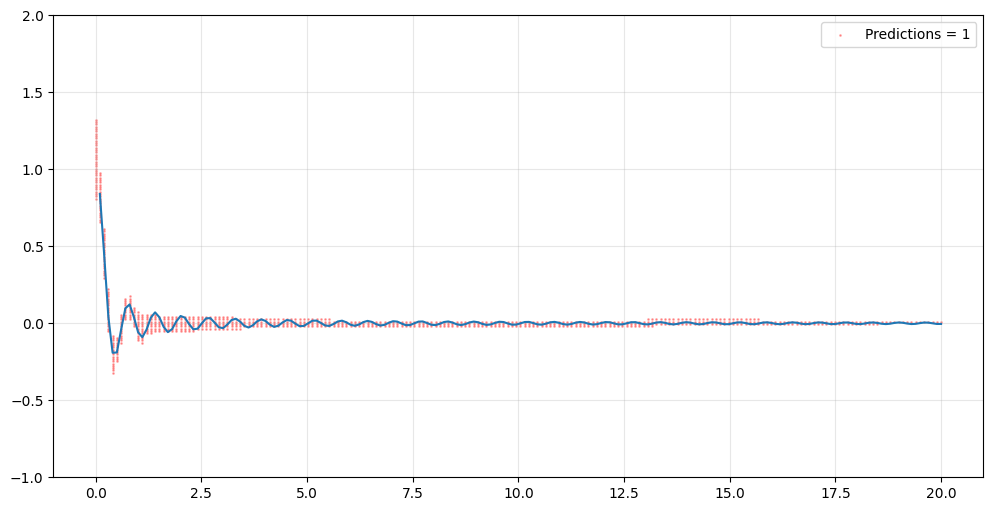

In [50]:
try:
    
    plt.figure(figsize=(12, 6))
    plt.scatter(X_ones, Y_ones, c='red', s=1, alpha=0.3, label='Predictions = 1')
    plt.plot(x_vis, np.sin(10*x_vis)/(10*x_vis))
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.ylim(-1, 2)
    plt.show()
    
except Exception as e:
    print(e)

Current working directory: /home/daxrpm/Desktop/EPN/metodos_numericos/proyecto
Predicting batch...
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 485us/step


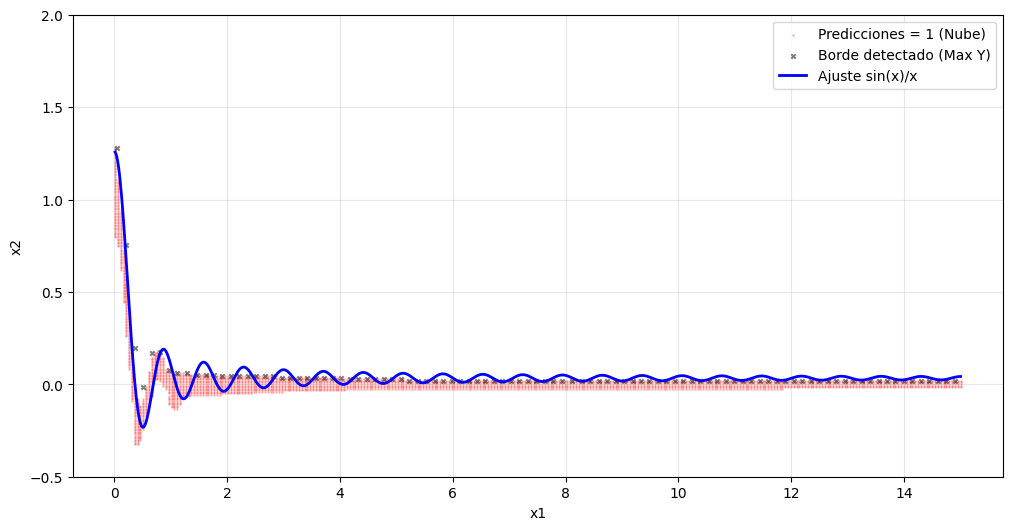

Ecuación encontrada: y = 1.2252 * sin(8.8969x) / (8.8969x) + 0.0332
RMSE del ajuste: 0.04728


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from Blackbox import load_model, predict_batch

def sinc_func(x, A, B, C):
    # A * sin(Bx)/(Bx) + C
    return A * np.sin(B * x) / (B * x + 1e-9) + C

model = load_model()

x_vals = np.linspace(0.01, 15, 300)
y_vals = np.linspace(-0.5, 2.0, 300)
X, Y = np.meshgrid(x_vals, y_vals)
X_flat, Y_flat = X.flatten(), Y.flatten()

print("Predicting batch...")
preds = predict_batch(model, X_flat.tolist(), Y_flat.tolist())
preds = np.array(preds)

mask_ones = preds == 1
x_ones = X_flat[mask_ones]
y_ones = Y_flat[mask_ones]


bins = np.linspace(0, 15, 100)
bx = []
by = []

for i in range(len(bins)-1):
    x_start, x_end = bins[i], bins[i+1]
    mask_slice = (x_ones >= x_start) & (x_ones < x_end)
    if np.any(mask_slice):
        bx.append(np.mean(x_ones[mask_slice]))
        by.append(np.max(y_ones[mask_slice]))

bx = np.array(bx)
by = np.array(by)

try:
    p0 = [1.4, 8.0, 0.0]
    popt, _ = curve_fit(sinc_func, bx, by, p0=p0, maxfev=10000)
    
    y_fit = sinc_func(bx, *popt)
    rmse = np.sqrt(np.mean((by - y_fit)**2))
    
    plt.figure(figsize=(12, 6))
    plt.scatter(x_ones, y_ones, c='red', s=1, alpha=0.2, label='Predicciones = 1 (Nube)')
    plt.scatter(bx, by, c='black', s=10, marker='x', alpha=0.5, label='Borde detectado (Max Y)')
    x_smooth = np.linspace(0.01, 15, 1000)
    plt.plot(x_smooth, sinc_func(x_smooth, *popt), 'b-', linewidth=2, label='Ajuste sin(x)/x')
    
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.ylim(-0.5, 2)
    plt.show()
    
    print(f"Ecuación encontrada: y = {popt[0]:.4f} * sin({popt[1]:.4f}x) / ({popt[1]:.4f}x) + {popt[2]:.4f}")
    print(f"RMSE del ajuste: {rmse:.5f}")

except Exception as e:
    print(f"Error en el ajuste: {e}")
